##Project

In [1]:
##Importing libraries
import numpy as np
import pandas as pd
# import libraries for plotting
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
#Loading dataset from drive for google colab
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

path = "/content/drive/My Drive/Colab Notebooks/Aus_Weather.csv"
Weather_data = pd.read_csv(path)


#Consider running this for running on local machine

#Weather_data = pd.read_csv("Aus_Weather.csv")
#Weather_data

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


**DATA EXPLORATION**

In [4]:
#Checking first few rows in the data
Weather_data.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0.0,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0.0,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,0.0,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,1.0,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0.2,No


In [5]:
#Reviewing the number of samples and attributes
Weather_data.shape

(142193, 24)

In [6]:
#Checking the column names
col_names = Weather_data.columns
col_names

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RISK_MM', 'RainTomorrow'],
      dtype='object')

In [7]:
#Summary about data
Weather_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142193 entries, 0 to 142192
Data columns (total 24 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           142193 non-null  object 
 1   Location       142193 non-null  object 
 2   MinTemp        141556 non-null  float64
 3   MaxTemp        141871 non-null  float64
 4   Rainfall       140787 non-null  float64
 5   Evaporation    81350 non-null   float64
 6   Sunshine       74377 non-null   float64
 7   WindGustDir    132863 non-null  object 
 8   WindGustSpeed  132923 non-null  float64
 9   WindDir9am     132180 non-null  object 
 10  WindDir3pm     138415 non-null  object 
 11  WindSpeed9am   140845 non-null  float64
 12  WindSpeed3pm   139563 non-null  float64
 13  Humidity9am    140419 non-null  float64
 14  Humidity3pm    138583 non-null  float64
 15  Pressure9am    128179 non-null  float64
 16  Pressure3pm    128212 non-null  float64
 17  Cloud9am       88536 non-null

In [8]:
#Categorical variables
categorical = [var for var in Weather_data.columns if Weather_data[var].dtype=='O']
print('The categorical variables are :', categorical)

The categorical variables are : ['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']


In [9]:
#Numerical variables
numerical = [var for var in Weather_data.columns if Weather_data[var].dtype!='O']
print('The numerical variables are :', numerical)

The numerical variables are : ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'RISK_MM']


In [10]:
#Finding out which of the columns have maximum null values
Weather_data.count().sort_values()

Sunshine          74377
Evaporation       81350
Cloud3pm          85099
Cloud9am          88536
Pressure9am      128179
Pressure3pm      128212
WindDir9am       132180
WindGustDir      132863
WindGustSpeed    132923
WindDir3pm       138415
Humidity3pm      138583
Temp3pm          139467
WindSpeed3pm     139563
Humidity9am      140419
RainToday        140787
Rainfall         140787
WindSpeed9am     140845
Temp9am          141289
MinTemp          141556
MaxTemp          141871
Date             142193
Location         142193
RISK_MM          142193
RainTomorrow     142193
dtype: int64

Text(0, 0.5, 'WindSpeed3pm')

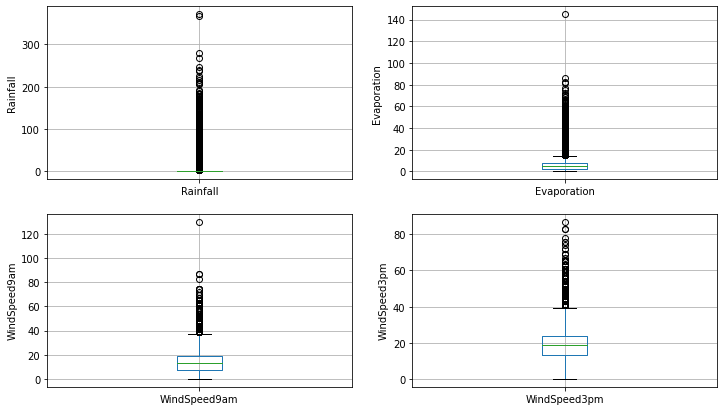

In [11]:
# Boxplots to visualize outliers in some of the numeric variables

plt.figure(figsize=(12,7))

plt.subplot(2, 2, 1)
fig = Weather_data.boxplot(column='Rainfall')
fig.set_title('')
fig.set_ylabel('Rainfall')

plt.subplot(2, 2, 2)
fig = Weather_data.boxplot(column='Evaporation')
fig.set_title('')
fig.set_ylabel('Evaporation')

plt.subplot(2, 2, 3)
fig = Weather_data.boxplot(column='WindSpeed9am')
fig.set_title('')
fig.set_ylabel('WindSpeed9am')

plt.subplot(2, 2, 4)
fig = Weather_data.boxplot(column='WindSpeed3pm')
fig.set_title('')
fig.set_ylabel('WindSpeed3pm')


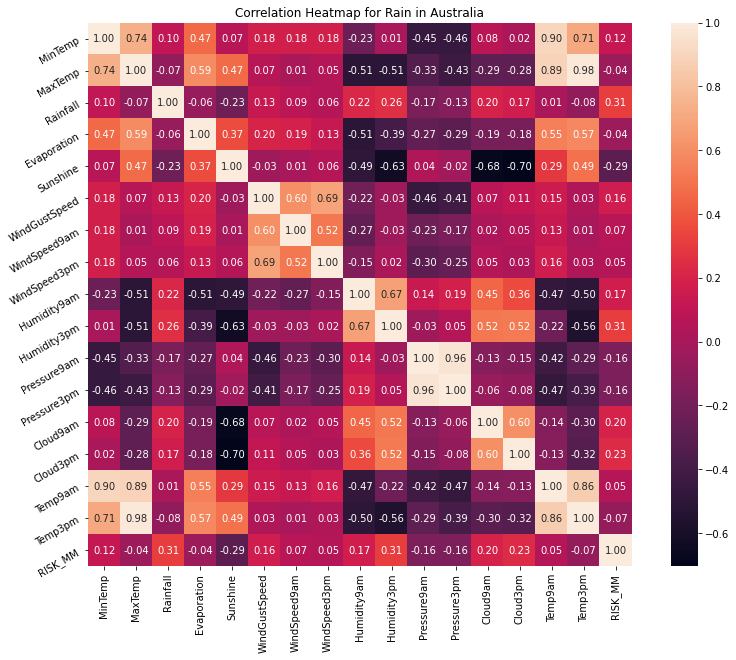

In [12]:
#HeatMap for finding the relationship between the variables
correlation = Weather_data.corr()
Weather_data.count().sort_values()
plt.figure(figsize=(14,10))
plt.title('Correlation Heatmap for Rain in Australia')
ax = sns.heatmap(correlation, square=True, annot=True, fmt='.2f', linecolor='white')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set_yticklabels(ax.get_yticklabels(), rotation=30)           
plt.show()

In [13]:
#Checking the frequency distribution of the target variable
Weather_data['RainTomorrow'].value_counts()

No     110316
Yes     31877
Name: RainTomorrow, dtype: int64

In [14]:
#Checking the frequency distribution in percentage for the target variable
Weather_data['RainTomorrow'].value_counts()/len(Weather_data)

No     0.775819
Yes    0.224181
Name: RainTomorrow, dtype: float64

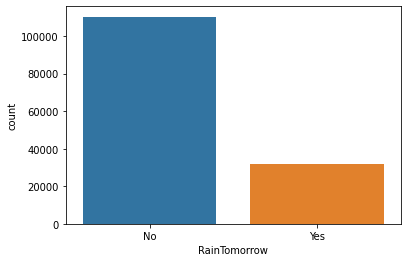

In [15]:
#Visualising target variable
plot_target = sns.countplot(Weather_data['RainTomorrow'])

###**DATA PRE-PROCESSING**

In [16]:
# Removing unnecessary columns from the data - reasons detailed in the report 
Weather_data = Weather_data.drop(columns=['Sunshine','Evaporation','Cloud3pm','Cloud9am','Location','RISK_MM','Date'],axis=1)
print(Weather_data.shape)
Weather_data.head()

(142193, 17)


,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,13.4,22.9,0.6,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,No,No
1,7.4,25.1,0.0,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,No,No
2,12.9,25.7,0.0,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2,No,No
3,9.2,28.0,0.0,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5,No,No
4,17.5,32.3,1.0,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7,No,No


In [17]:
#Deleting all the rows with null values
Weather_data = Weather_data.dropna(how='any',axis=0)
Weather_data.shape

(112925, 17)

In [18]:
#Cross-checking Null values in Target Variable
Weather_data['RainTomorrow'].isnull().sum()

0

In [19]:
#Removing outliers in our data using Z-score 
from scipy import stats
z = np.abs(stats.zscore(Weather_data._get_numeric_data()))
print(z)
Weather_data= Weather_data[(z < 3).all(axis=1)]
print(Weather_data.shape)

[[0.11756741 0.10822071 0.20666127 ... 1.14245477 0.08843526 0.04787026]
 [0.84180219 0.20684494 0.27640495 ... 1.04184813 0.04122846 0.31776848]
 [0.03761995 0.29277194 0.27640495 ... 0.91249673 0.55672435 0.15688743]
 ...
 [1.44940294 0.23548728 0.27640495 ... 0.58223051 1.03257127 0.34701958]
 [1.16159206 0.46462594 0.27640495 ... 0.25166583 0.78080166 0.58102838]
 [0.77784422 0.4789471  0.27640495 ... 0.2085487  0.37167606 0.56640283]]
(107868, 17)


In [20]:
#Encoding RainTomorrow variable to 0 and 1 where 0 corresponds to 'No' and 1 is 'Yes'
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
Weather_data['RainToday'] = label_encoder.fit_transform(Weather_data['RainToday'])
Weather_data['RainTomorrow'] = label_encoder.fit_transform(Weather_data['RainTomorrow'])
Weather_data.head()

,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,13.4,22.9,0.6,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,0,0
1,7.4,25.1,0.0,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,0,0
2,12.9,25.7,0.0,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2,0,0
3,9.2,28.0,0.0,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5,0,0
4,17.5,32.3,1.0,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7,0,0


In [21]:
#Encoding of categorical columns
#Checking unique values and converting them to int using pd.getDummies() 
categorical_columns = ['WindGustDir', 'WindDir3pm', 'WindDir9am']
for col in categorical_columns:
    print(np.unique(Weather_data[col]))
#Transforming the categorical columns-label encoding
Weather_data = pd.get_dummies(Weather_data, columns=categorical_columns)

['E' 'ENE' 'ESE' 'N' 'NE' 'NNE' 'NNW' 'NW' 'S' 'SE' 'SSE' 'SSW' 'SW' 'W'
 'WNW' 'WSW']
['E' 'ENE' 'ESE' 'N' 'NE' 'NNE' 'NNW' 'NW' 'S' 'SE' 'SSE' 'SSW' 'SW' 'W'
 'WNW' 'WSW']
['E' 'ENE' 'ESE' 'N' 'NE' 'NNE' 'NNW' 'NW' 'S' 'SE' 'SSE' 'SSW' 'SW' 'W'
 'WNW' 'WSW']


In [22]:
#Standardization of data using MinMaxScaler
from sklearn import preprocessing
Std_data = preprocessing.MinMaxScaler()
Std_data.fit(Weather_data)
Weather_data = pd.DataFrame(Std_data.transform(Weather_data), index=Weather_data.index, columns=Weather_data.columns)
Weather_data.head()

,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,WindGustDir_E,WindGustDir_ENE,WindGustDir_ESE,WindGustDir_N,WindGustDir_NE,WindGustDir_NNE,WindGustDir_NNW,WindGustDir_NW,WindGustDir_S,WindGustDir_SE,WindGustDir_SSE,WindGustDir_SSW,WindGustDir_SW,WindGustDir_W,WindGustDir_WNW,WindGustDir_WSW,WindDir3pm_E,WindDir3pm_ENE,WindDir3pm_ESE,WindDir3pm_N,WindDir3pm_NE,WindDir3pm_NNE,WindDir3pm_NNW,WindDir3pm_NW,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW,WindDir9am_E,WindDir9am_ENE,WindDir9am_ESE,WindDir9am_N,WindDir9am_NE,WindDir9am_NNE,WindDir9am_NNW,WindDir9am_NW,WindDir9am_S,WindDir9am_SE,WindDir9am_SSE,WindDir9am_SSW,WindDir9am_SW,WindDir9am_W,WindDir9am_WNW,WindDir9am_WSW
0,0.518717,0.464198,0.021429,0.506849,0.486486,0.523810,0.674157,0.22,0.268409,0.309353,0.478723,0.472081,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.358289,0.518519,0.000000,0.506849,0.054054,0.476190,0.370787,0.25,0.337292,0.326139,0.486702,0.535533,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.505348,0.533333,0.000000,0.534247,0.459459,0.571429,0.303371,0.30,0.266033,0.347722,0.587766,0.507614,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.406417,0.590123,0.000000,0.232877,0.243243,0.166667,0.382022,0.16,0.503563,0.446043,0.510638,0.591371,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.628342,0.696296,0.035714,0.465753,0.135135,0.428571,0.797753,0.33,0.342043,0.282974,0.502660,0.672589,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


*DATA BALANCING(OVERSAMPLING)*


In [23]:
#Segregating inputs and target variable
print(Weather_data.RainTomorrow.value_counts())
X = Weather_data.drop('RainTomorrow', axis=1)
Y = Weather_data['RainTomorrow']

0.0    85475
1.0    22393
Name: RainTomorrow, dtype: int64


SMOTE over-sampling:
1.0    85475
0.0    85475
Name: RainTomorrow, dtype: int64


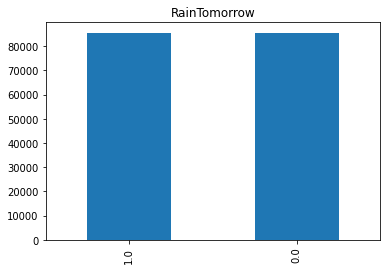

In [24]:
#Oversampling using SMOTE
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=42)
X_res, Y_res = sm.fit_resample(X, Y)

Weather_data_smote_over = pd.concat([pd.DataFrame(X_res), pd.DataFrame(Y_res, columns=['RainTomorrow'])], axis=1)
print('SMOTE over-sampling:')
print(Weather_data_smote_over.RainTomorrow.value_counts())

#Plot
Weather_data_smote_over.RainTomorrow.value_counts().plot(kind='bar', title='RainTomorrow');

In [25]:
#Checking shape of the new data
Weather_data_smote_over.shape

(170950, 62)

In [26]:
Weather_data_smote_over.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,RainTomorrow
0,0.518717,0.464198,0.021429,0.506849,0.486486,0.523810,0.674157,0.22,0.268409,0.309353,0.478723,0.472081,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.358289,0.518519,0.000000,0.506849,0.054054,0.476190,0.370787,0.25,0.337292,0.326139,0.486702,0.535533,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.505348,0.533333,0.000000,0.534247,0.459459,0.571429,0.303371,0.30,0.266033,0.347722,0.587766,0.507614,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.406417,0.590123,0.000000,0.232877,0.243243,0.166667,0.382022,0.16,0.503563,0.446043,0.510638,0.591371,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.628342,0.696296,0.035714,0.465753,0.135135,0.428571,0.797753,0.33,0.342043,0.282974,0.502660,0.672589,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


*FEATURE SELECTION*

In [0]:
#Splitting Input and Target values in the new data
from sklearn.model_selection import train_test_split
X = Weather_data_smote_over.loc[:, Weather_data_smote_over.columns != 'RainTomorrow']
y = Weather_data_smote_over.loc[:,'RainTomorrow']

In [28]:
#Feature Selection using chi2
from sklearn.feature_selection import SelectKBest,chi2

selector = SelectKBest(chi2, k=5)
fit = selector.fit(X, y)

Scores = pd.DataFrame(fit.scores_)
Columns = pd.DataFrame(X.columns)
#concatenating two dataframes for better visualization 
ZScores = pd.concat([Columns,Scores],axis=1)
ZScores.columns = ['Specs','Score']
#printing top 5 features
print(ZScores.nlargest(5,'Score'))  

X_new = selector.transform(X)
print(X.columns[selector.get_support(indices=True)])

   Specs         Score
12    12  12068.804234
2      2   4264.821868
7      7   3739.409829
6      6   1172.851980
48    48   1060.143766
Index([2, 6, 7, 12, 48], dtype='object')


In [0]:
#Splitting data in the ratio of 70:30 for training and testing
X_train,X_test,y_train,y_test = train_test_split(X_new,y,test_size=0.30)

###**MODELS WITH HYPERPARAMETER OPTIMIZATION**

In [0]:
#Models creation
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

In [31]:
#Logistic Regression with Randomized Search CV
LR = LogisticRegression()

#create a dictionary
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01]
LR_grid = dict(solver=solvers,penalty=penalty,C=c_values)

#Randomised gridsearch to test all values
n_iter_search = 10
LR_search = RandomizedSearchCV(estimator=LR, 
                  param_distributions=LR_grid, n_iter=n_iter_search, cv=5) 

#fit model to training data
LR_search.fit(X_train, y_train)
#Saving best Logistic Regression model
LR_best = LR_search.best_estimator_
#Checking best n_estimators value
print(LR_search.best_params_)

#Predictions on test data
LR_predict_test = LR_best.predict(X_test)
#Accuracy on test data
print('Accuracy using Log_Reg: {}'.format(LR_best.score(X_test, y_test)))

{'solver': 'lbfgs', 'penalty': 'l2', 'C': 1.0}
Accuracy using Log_Reg: 0.7462220922296968


In [32]:
#Decision Tree with Randomized Search CV
DT = DecisionTreeClassifier()

#create a dictionary
DT_grid = { 'max_depth': np.arange(3, 15)}

#Randomised gridsearch to test all values
n_iter_search = 10
DT_search = RandomizedSearchCV(estimator=DT, 
                  param_distributions=DT_grid, n_iter=n_iter_search, cv=5) 

#fit model to training data
DT_search.fit(X_train, y_train)
#Saving best Decision Tree model
DT_best = DT_search.best_estimator_
#Checking best n_estimators value
print(DT_search.best_params_)

#Predictions on test data
DT_predict_test = DT_best.predict(X_test)
#Accuracy on test data
print('Accuracy using Decision Tree: {}'.format(DT_best.score(X_test, y_test)))

{'max_depth': 14}
Accuracy using Decision Tree: 0.8234766500926197


In [33]:
#Bagging Classifier with Randomized Search CV
BAG = BaggingClassifier()

#create a dictionary
n_estimators = [10, 100, 1000]
BAG_grid = dict(n_estimators=n_estimators)

#Randomised gridsearch to test all values
n_iter_search = 10
BAG_search = RandomizedSearchCV(estimator=BAG, 
                  param_distributions=BAG_grid, n_iter=n_iter_search, cv=5) 

#fit model to training data
BAG_search.fit(X_train, y_train)
#Saving best Bagging model
BAG_best = BAG_search.best_estimator_
#Checking best n_estimators value
print(BAG_search.best_params_)

#Predictions on test data
BAG_predict_test = BAG_best.predict(X_test)
#Accuracy on test data
print('Accuracy using Bagging: {}'.format(BAG_best.score(X_test, y_test)))

{'n_estimators': 1000}
Accuracy using Bagging: 0.8741542361314224


In [34]:
#Random Forest with Randomized Search CV
RF = RandomForestClassifier()

#create a dictionary
n_estimators = [10, 100, 1000]
max_features = ['sqrt', 'log2']
RF_grid = dict(n_estimators=n_estimators,max_features=max_features)

#Randomised gridsearch to test all values
n_iter_search = 10
RF_search = RandomizedSearchCV(estimator=RF, 
                  param_distributions=RF_grid, n_iter=n_iter_search, cv=5) 

#fit model to training data
RF_search.fit(X_train, y_train)
#Saving best Random Forest model
RF_best = RF_search.best_estimator_
#Checking best n_estimators value
print(RF_search.best_params_)

#Predictions on test data
RF_predict_test = RF_best.predict(X_test)
#Accuracy on test data
print('Accuracy using Random Forest: {}'.format(RF_best.score(X_test, y_test)))

{'n_estimators': 1000, 'max_features': 'log2'}
Accuracy using Random Forest: 0.8747392024958565


####**FINAL MODEL EVALUATION**

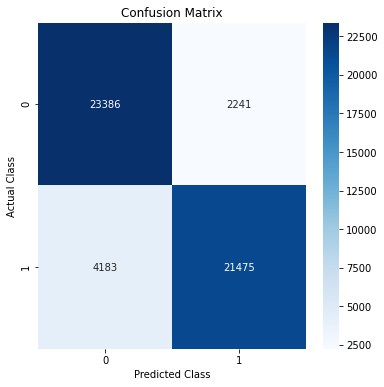

In [44]:
# Random Forest Model evaluation
from sklearn.metrics import confusion_matrix
import seaborn as sns
cm = confusion_matrix(y_test, RF_predict_test)

plt.figure(figsize = (6,6))
sns.heatmap(cm,fmt="d",cmap='Blues',annot=True)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Class")
plt.ylabel("Actual Class")
plt.show()

In [45]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_test,RF_predict_test)
print('Classification Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(y_test, RF_predict_test)
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(y_test,RF_predict_test)
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test,RF_predict_test)
print('F1 score: %f' % f1)

Classification Accuracy: 0.874739
Precision: 0.905507
Recall: 0.836971
F1 score: 0.869891


In [46]:
from sklearn.metrics import classification_report
print(classification_report(y_test, RF_predict_test))

              precision    recall  f1-score   support

         0.0       0.85      0.91      0.88     25627
         1.0       0.91      0.84      0.87     25658

    accuracy                           0.87     51285
   macro avg       0.88      0.87      0.87     51285
weighted avg       0.88      0.87      0.87     51285



AUC: 0.875


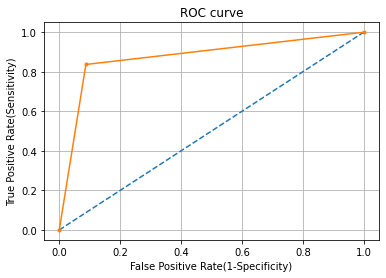

In [49]:
from sklearn import metrics
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from matplotlib import pyplot as plt

# calculating AUC
auc = roc_auc_score(y_test,RF_predict_test)
print('AUC: %.3f' % auc)

# calculating roc curve
fpr,tpr,thresholds = metrics.roc_curve(y_test, RF_predict_test)

#Plotting ROC curve
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.title('ROC curve')
plt.xlabel('False Positive Rate(1-Specificity)')
plt.ylabel('True Positive Rate(Sensitivity)')
plt.grid(True)